In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import EarlyStopping

In [ ]:
# download datasets from repository
!wget https://github.com/Raihan2503/capstone-ml/raw/main/kain-tapis-datasets.zip

--2023-12-22 00:32:42--  https://github.com/Raihan2503/capstone-ml/raw/raihan_develop/tapis-terbaru.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Raihan2503/capstone-ml/raihan_develop/tapis-terbaru.zip [following]
--2023-12-22 00:32:42--  https://raw.githubusercontent.com/Raihan2503/capstone-ml/raihan_develop/tapis-terbaru.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86571714 (83M) [application/zip]
Saving to: ‘tapis-terbaru.zip’

tapis-terbaru.zip   100%[===================>]  82.56M   162MB/s    in 0.5s    

2023-12-22 00:32:46 (162 MB/s) - ‘tapis-terbaru.zip’ saved [86571714/8657

In [ ]:
class customCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
      print("\nTraining has stoped!")
      self.model.stop_training = True

In [ ]:
import zipfile
local_zip = 'kain-tapis-datasets.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir = './kain-tapis-datasets/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    shear_range=0.2,
    zoom_range=0.2,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    horizontal_flip=True,
    # fill_mode='nearest',
    validation_split=0.3,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    # batch_size=67,
    class_mode='categorical',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    # batch_size=40,
    class_mode='categorical',
    subset='validation'
)

Found 1116 images belonging to 7 classes.
Found 473 images belonging to 7 classes.


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    # keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    # keras.layers.Conv2D(128, (3,3), activation='relu'),
    # keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 35, 35, 64)       

In [ ]:
callback = customCallback()
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10,
    callbacks=[callback],
    verbose=1
)

Epoch 1/20
10/10 [==============================] - 22s 2s/step - loss: 13.2482 - accuracy: 0.1469 - val_loss: 1.8818 - val_accuracy: 0.1719
Epoch 2/20
10/10 [==============================] - 27s 3s/step - loss: 1.8321 - accuracy: 0.2911 - val_loss: 1.7426 - val_accuracy: 0.1906
Epoch 3/20
10/10 [==============================] - 20s 2s/step - loss: 1.7904 - accuracy: 0.2937 - val_loss: 1.4257 - val_accuracy: 0.5531
Epoch 4/20
10/10 [==============================] - 27s 3s/step - loss: 1.4982 - accuracy: 0.5156 - val_loss: 1.3704 - val_accuracy: 0.3875
Epoch 5/20
10/10 [==============================] - 27s 3s/step - loss: 1.2788 - accuracy: 0.5375 - val_loss: 0.9840 - val_accuracy: 0.6875
Epoch 6/20
10/10 [==============================] - 28s 3s/step - loss: 1.1578 - accuracy: 0.6094 - val_loss: 1.0867 - val_accuracy: 0.6187
Epoch 7/20
10/10 [==============================] - 18s 2s/step - loss: 1.0120 - accuracy: 0.6719 - val_loss: 0.7297 - val_accuracy: 0.7812
Epoch 8/20
10/10 [=

# Testing Model

Saving pucuk rebung-67-min.jpg to pucuk rebung-67-min.jpg
1/1 [==============================] - 0s 20ms/step
pucuk rebung-67-min.jpg
pucuk rebung


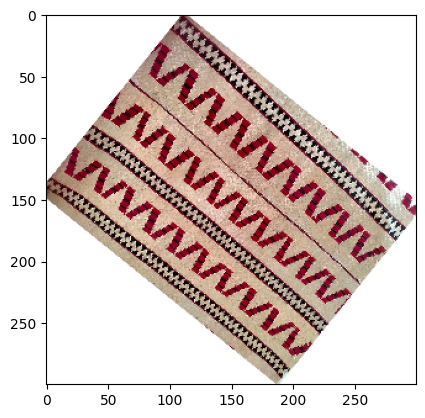

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if (classes[0][0] == 1) :
    print("antik")
  elif (classes[0][1] == 1) :
    print("jung sarat")
  elif (classes[0][2] == 1) :
    print("lasem")
  elif (classes[0][3] == 1) :
    print("Lauk handak")
  elif (classes[0][4] == 1) :
    print("lima sekebar")
  elif (classes[0][5] == 1) :
    print("mata kibau")
  elif (classes[0][6] == 1) :
    print("pucuk rebung")

In [ ]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():

#   # predicting images
#   path = fn
#   img = image.load_img(path, target_size=(240, 240))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(fn)
#   print(classes)

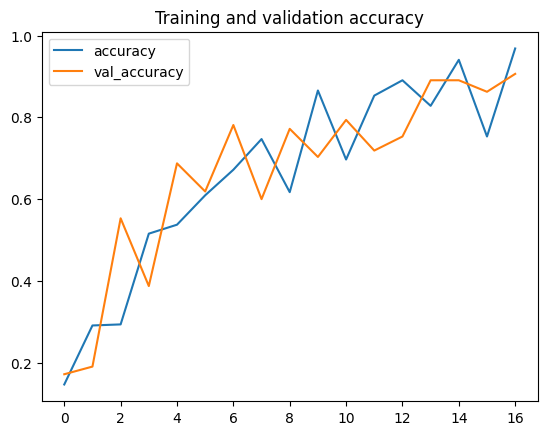

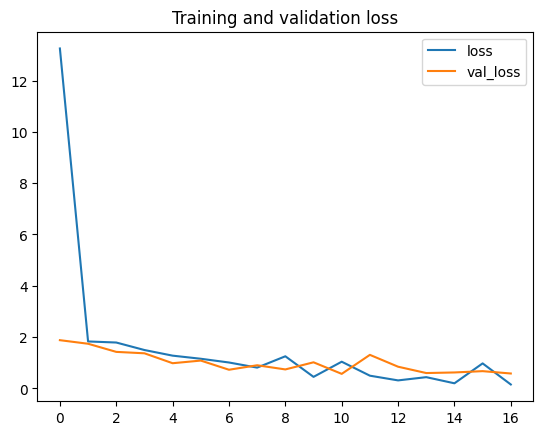

In [ ]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='accuracy')
plt.plot  ( epochs, val_acc, label='val_accuracy')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='loss')
plt.plot  ( epochs, val_loss, label='val_loss')
plt.title ('Training and validation loss'   )
plt.legend()

# Save Model

In [ ]:
model.save('model_deploy.h5')

In [93]:
keras_model = tf.keras.models.load_model('model_deploy.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

tflite_model_path = 'model/save/model.tflite'
tf.io.write_file(tflite_model_path, tflite_model)